# Assissment 2:
## The topic: Is there a correlation between levels of deprivation and total crime in Leeds?

### Prepare data

In [1]:
# import required packages to be able to run the following code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import missingno as ms
# set seaborn plotting theme to white
sns.set_theme(style="white")

In [2]:
#read the file
crime = pd.read_csv("D:/GEOG5990/Python/FINAL DATA/2021-04-west-yorkshire-street.csv")
#read the file
depri = pd.read_csv("D:/GEOG5990/Python/FINAL DATA/uk_imd2019.csv")
# read the leeds shapefile
leeds_shp =gpd.read_file("D:\GEOG5990\Python\FINAL DATA\Leeds.geojson")

### Explore and clean data

In [3]:
# view first 5 rows of the crime dataframe to get an overview of the dataframe
crime.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,d9e3417dad8742d480aea5d30b11ae788ed6b7aa267a29...,2021-04,West Yorkshire Police,West Yorkshire Police,-1.905890,53.930295,On or near Brown Bank Lane,E01010646,Bradford 001A,Burglary,Investigation complete; no suspect identified,NaN
1,bc4e6efed170af421d98c39e2854e91bf3b933cfdcb4b2...,2021-04,West Yorkshire Police,West Yorkshire Police,-1.877784,53.948129,On or near The Paddock,E01010646,Bradford 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
2,5fd3d231aad8778fa624377045059a8dc4aa3779c3b9c7...,2021-04,West Yorkshire Police,West Yorkshire Police,-1.877784,53.948129,On or near The Paddock,E01010646,Bradford 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
3,7f2d605e3e74585a07e14aa0b04d9a78221e128fe9f98d...,2021-04,West Yorkshire Police,West Yorkshire Police,-1.879359,53.946225,On or near The Acres,E01010646,Bradford 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
4,c525f6487edef046c82c0adb00492c9a8bc8de3ec29d71...,2021-04,West Yorkshire Police,West Yorkshire Police,-1.887983,53.945918,On or near Burns Hill,E01010647,Bradford 001B,Drugs,Local resolution,NaN


In [4]:
#Filter out data about Leeds from the dataset to narrow the scope of research
crime_leeds=[]
crime_leeds=crime[crime['LSOA name'].str.contains("Leeds",na=False)]
crime_leeds.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
13169,NaN,2021-04,West Yorkshire Police,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,E01011698,Leeds 001A,Anti-social behaviour,NaN,NaN
13170,NaN,2021-04,West Yorkshire Police,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,E01011698,Leeds 001A,Anti-social behaviour,NaN,NaN
13171,NaN,2021-04,West Yorkshire Police,West Yorkshire Police,-1.388828,53.936031,On or near Coxwold Hill,E01011698,Leeds 001A,Anti-social behaviour,NaN,NaN
13172,344f3d86f545201b9cbf92fb76120d869f3f424af899a0...,2021-04,West Yorkshire Police,West Yorkshire Police,-1.388671,53.935321,On or near Coxwold View,E01011698,Leeds 001A,Other theft,Investigation complete; no suspect identified,NaN
13173,cb08c4dabf2fc418afb705d17e85fb42815d691028051a...,2021-04,West Yorkshire Police,West Yorkshire Police,-1.390705,53.936850,On or near Maple Drive,E01011698,Leeds 001A,Robbery,Investigation complete; no suspect identified,NaN


In [5]:
#identify if the cell in the dataframe contains no data
crime_leeds.isnull().sum()

Crime ID                 1346
Month                       0
Reported by                 0
Falls within                0
Longitude                   0
Latitude                    0
Location                    0
LSOA code                   0
LSOA name                   0
Crime type                  0
Last outcome category    1346
Context                  9043
dtype: int64

In [6]:
# Look at the types of the columns to check whether the data type is appropriate
crime_leeds.dtypes

Crime ID                  object
Month                     object
Reported by               object
Falls within              object
Longitude                float64
Latitude                 float64
Location                  object
LSOA code                 object
LSOA name                 object
Crime type                object
Last outcome category     object
Context                  float64
dtype: object

In [7]:
#Remove useless data columns from the dataframe to make subsequent research more convenient and focus on key data
crime_leeds=crime_leeds.drop('Crime ID',axis=1)
crime_leeds=crime_leeds.drop(['Last outcome category'],axis=1)
crime_leeds=crime_leeds.drop(['Context'],axis=1)
# view first 5 rows of the crime_leeds datafame
crime_leeds.head()

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
13169,2021-04,West Yorkshire Police,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,E01011698,Leeds 001A,Anti-social behaviour
13170,2021-04,West Yorkshire Police,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,E01011698,Leeds 001A,Anti-social behaviour
13171,2021-04,West Yorkshire Police,West Yorkshire Police,-1.388828,53.936031,On or near Coxwold Hill,E01011698,Leeds 001A,Anti-social behaviour
13172,2021-04,West Yorkshire Police,West Yorkshire Police,-1.388671,53.935321,On or near Coxwold View,E01011698,Leeds 001A,Other theft
13173,2021-04,West Yorkshire Police,West Yorkshire Police,-1.390705,53.936850,On or near Maple Drive,E01011698,Leeds 001A,Robbery


In [8]:
# view first 5 rows of the 'depri' dataframe to get an overview of the dataframe
depri.head()

,LSOA,LANAME,Rank,SOA_pct,SOA_decile,LA_Rank,LA_pct,LA_decile
0,E01000001,City of London,29199,89,9,208,66,7
1,E01000002,City of London,30379,92,10,208,66,7
2,E01000003,City of London,14915,45,5,208,66,7
3,E01000005,City of London,8678,26,3,208,66,7
4,E01000006,Barking and Dagenham,14486,44,5,5,2,1


In [9]:
#Filter out data about Leeds from the dataset to narrow the scope of research
depri_leeds=[]
depri_leeds=depri[depri['LANAME'].str.contains("Leeds",na=False)]
depri_leeds.head()

,LSOA,LANAME,Rank,SOA_pct,SOA_decile,LA_Rank,LA_pct,LA_decile
10947,E01011264,Leeds,13915,42,5,93,29,3
10948,E01011265,Leeds,20368,62,7,93,29,3
10949,E01011266,Leeds,29666,90,10,93,29,3
10950,E01011267,Leeds,9111,28,3,93,29,3
10951,E01011268,Leeds,6082,19,2,93,29,3


In [10]:
# generate statistical summaries about data to identify whether there are outliers in the dataset
depri_leeds.describe()

,Rank,SOA_pct,SOA_decile,LA_Rank,LA_pct,LA_decile
count,482.000000,482.000000,482.000000,482.0,482.0,482.0
mean,14058.024896,42.802905,4.796680,93.0,29.0,3.0
std,10160.311348,30.936602,3.074973,0.0,0.0,0.0
min,38.000000,0.000000,1.000000,93.0,29.0,3.0
25%,3789.250000,11.250000,2.000000,93.0,29.0,3.0
50%,14326.500000,44.000000,5.000000,93.0,29.0,3.0
75%,22774.750000,69.000000,7.000000,93.0,29.0,3.0
max,32664.000000,99.000000,10.000000,93.0,29.0,3.0


In [11]:
#identify if the cell in the dataframe contains no data
depri_leeds.isnull().sum()

LSOA          0
LANAME        0
Rank          0
SOA_pct       0
SOA_decile    0
LA_Rank       0
LA_pct        0
LA_decile     0
dtype: int64

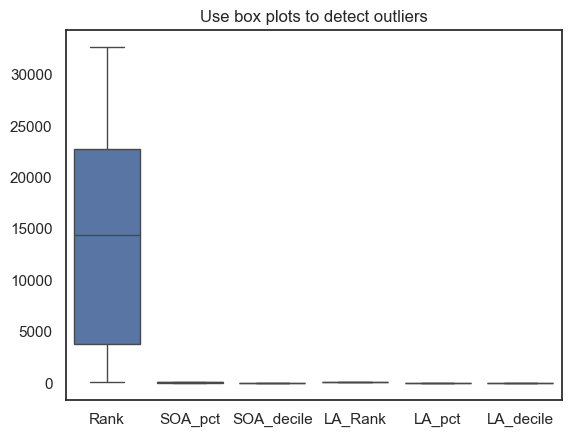

In [12]:
# Use box plots to detect outliers to be able to more clearly discover the distribution of outliers
sns.boxplot(data=depri_leeds)
# Name the plot
plt.title('Use box plots to detect outliers')
# Show the plot
plt.show()

In [13]:
# join the crime_leeds data to the depri_leeds dataframe using a lefthand join, on the common ID 'LSOA code'/'LSOA' to relate the crime incidence in each area to its level of deprivation
leeds =crime_leeds.merge(depri_leeds, how='left',left_on='LSOA code',right_on='LSOA')

In [14]:
# view first 5 rows of the leeds datafame to get an overview of the dataframe
leeds.head()

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,LSOA,LANAME,Rank,SOA_pct,SOA_decile,LA_Rank,LA_pct,LA_decile
0,2021-04,West Yorkshire Police,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,E01011698,Leeds 001A,Anti-social behaviour,E01011698,Leeds,27923.0,85.0,9.0,93.0,29.0,3.0
1,2021-04,West Yorkshire Police,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,E01011698,Leeds 001A,Anti-social behaviour,E01011698,Leeds,27923.0,85.0,9.0,93.0,29.0,3.0
2,2021-04,West Yorkshire Police,West Yorkshire Police,-1.388828,53.936031,On or near Coxwold Hill,E01011698,Leeds 001A,Anti-social behaviour,E01011698,Leeds,27923.0,85.0,9.0,93.0,29.0,3.0
3,2021-04,West Yorkshire Police,West Yorkshire Police,-1.388671,53.935321,On or near Coxwold View,E01011698,Leeds 001A,Other theft,E01011698,Leeds,27923.0,85.0,9.0,93.0,29.0,3.0
4,2021-04,West Yorkshire Police,West Yorkshire Police,-1.390705,53.936850,On or near Maple Drive,E01011698,Leeds 001A,Robbery,E01011698,Leeds,27923.0,85.0,9.0,93.0,29.0,3.0


<Axes: >

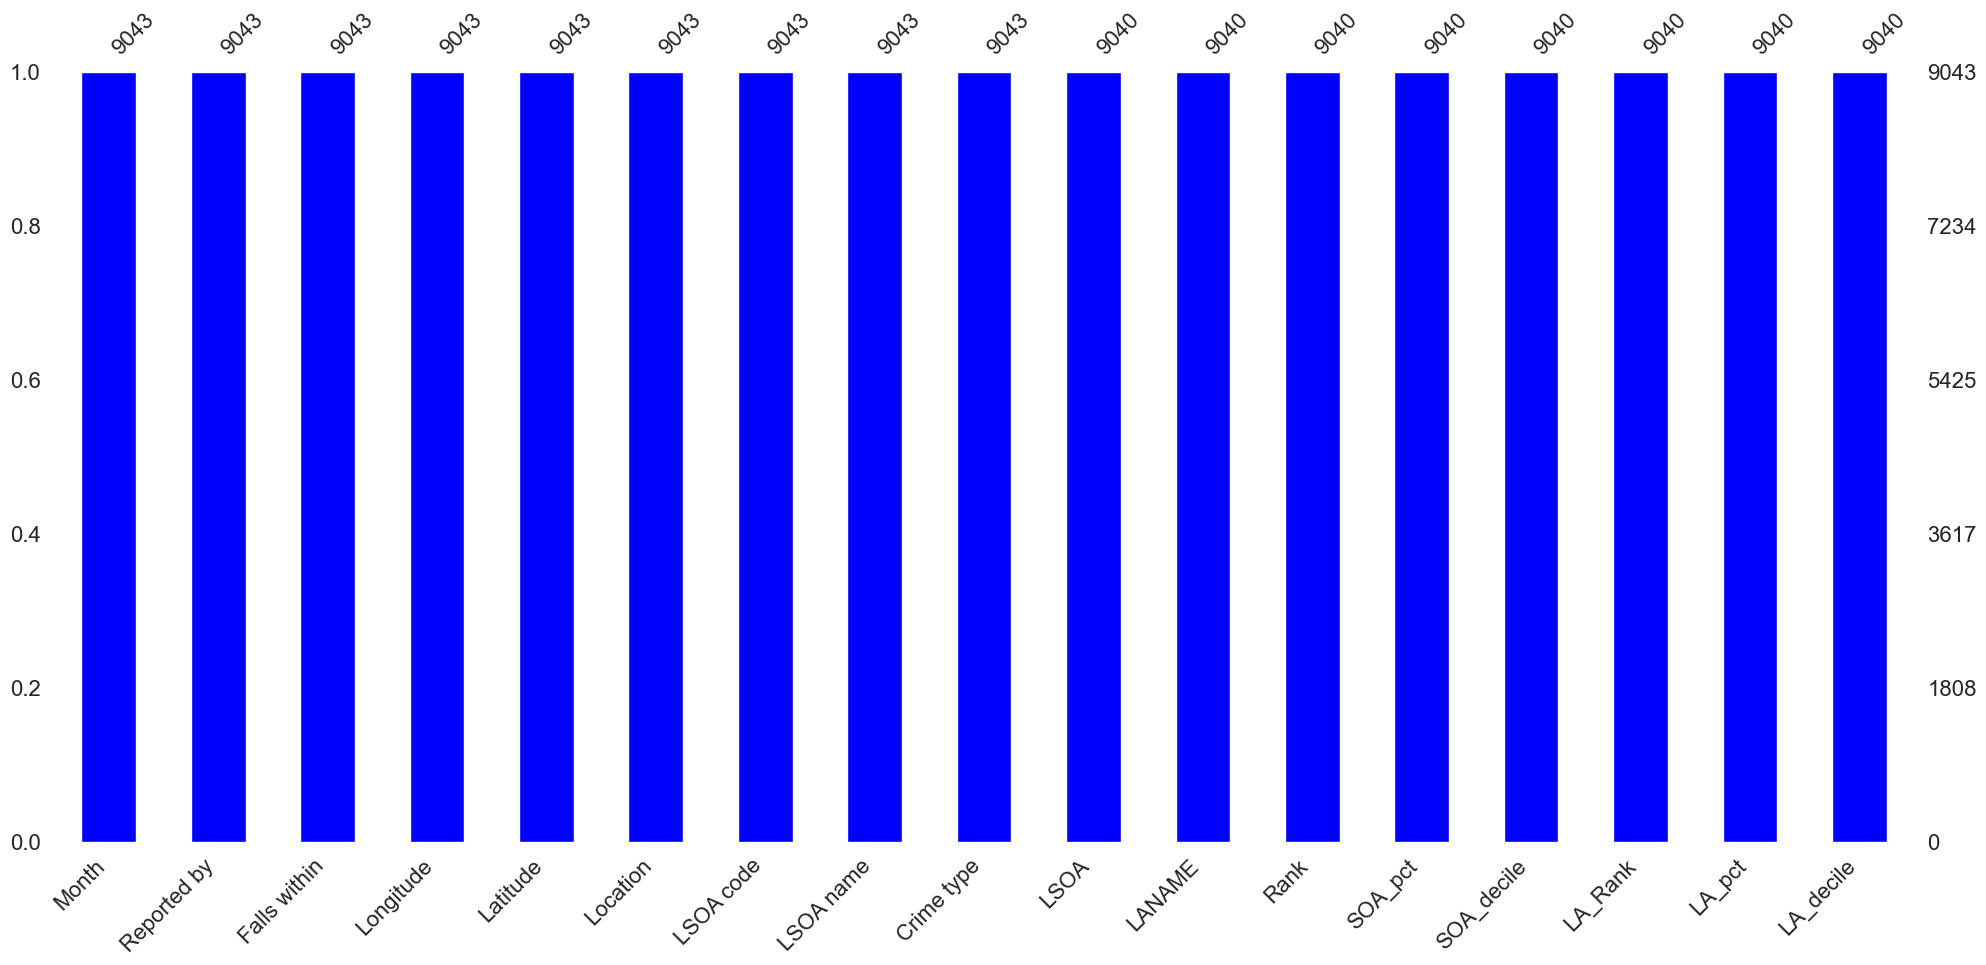

In [15]:
# Use visualization to identify whether a dataframe has null values to more clearly observe columns with null values
ms.bar(leeds,color='blue')

In [16]:
#identify if the cell in the dataframe contains no data
leeds.isnull().sum()

Month           0
Reported by     0
Falls within    0
Longitude       0
Latitude        0
Location        0
LSOA code       0
LSOA name       0
Crime type      0
LSOA            3
LANAME          3
Rank            3
SOA_pct         3
SOA_decile      3
LA_Rank         3
LA_pct          3
LA_decile       3
dtype: int64

In [17]:
#Remove null values
leeds=leeds.dropna()
#Check this data set again for null values
leeds.isnull().sum()

Month           0
Reported by     0
Falls within    0
Longitude       0
Latitude        0
Location        0
LSOA code       0
LSOA name       0
Crime type      0
LSOA            0
LANAME          0
Rank            0
SOA_pct         0
SOA_decile      0
LA_Rank         0
LA_pct          0
LA_decile       0
dtype: int64

In [18]:
# Create new dataset
# Taking the value of "LSOA code" as a group, count how many pieces of data each group has, and save the results in the "counts" list
counts=leeds.groupby('LSOA code').size()

In [19]:
# view first 5 rows of the 'counts' dataset to get an overview of the dataframe
counts.head()

LSOA code
E01011264     3
E01011265    20
E01011266    12
E01011267     9
E01011268    13
dtype: int64

In [20]:
# Rename columns in a dataset so they are better understood
counts.rename('crime_count',inplace=True)

LSOA code
E01011264     3
E01011265    20
E01011266    12
E01011267     9
E01011268    13
             ..
E01033031    39
E01033032    35
E01033033     7
E01033034    16
E01033035    33
Name: crime_count, Length: 480, dtype: int64

In [21]:
# Convert dataset to dataframe
cnts = pd.DataFrame(counts)

In [22]:
# view first 5 rows of the 'cnts' datafame to get an overview of the dataframe
cnts.head()

,crime_count
LSOA code,
E01011264,3
E01011265,20
E01011266,12
E01011267,9
E01011268,13


In [23]:
# join the depri_leeds data to the 'cnts' dataframe using a lefthand join, on the common ID 'LSOA'/'LSOA code'
LS =depri_leeds.merge(cnts, how='left',left_on='LSOA',right_on='LSOA code')

<Axes: >

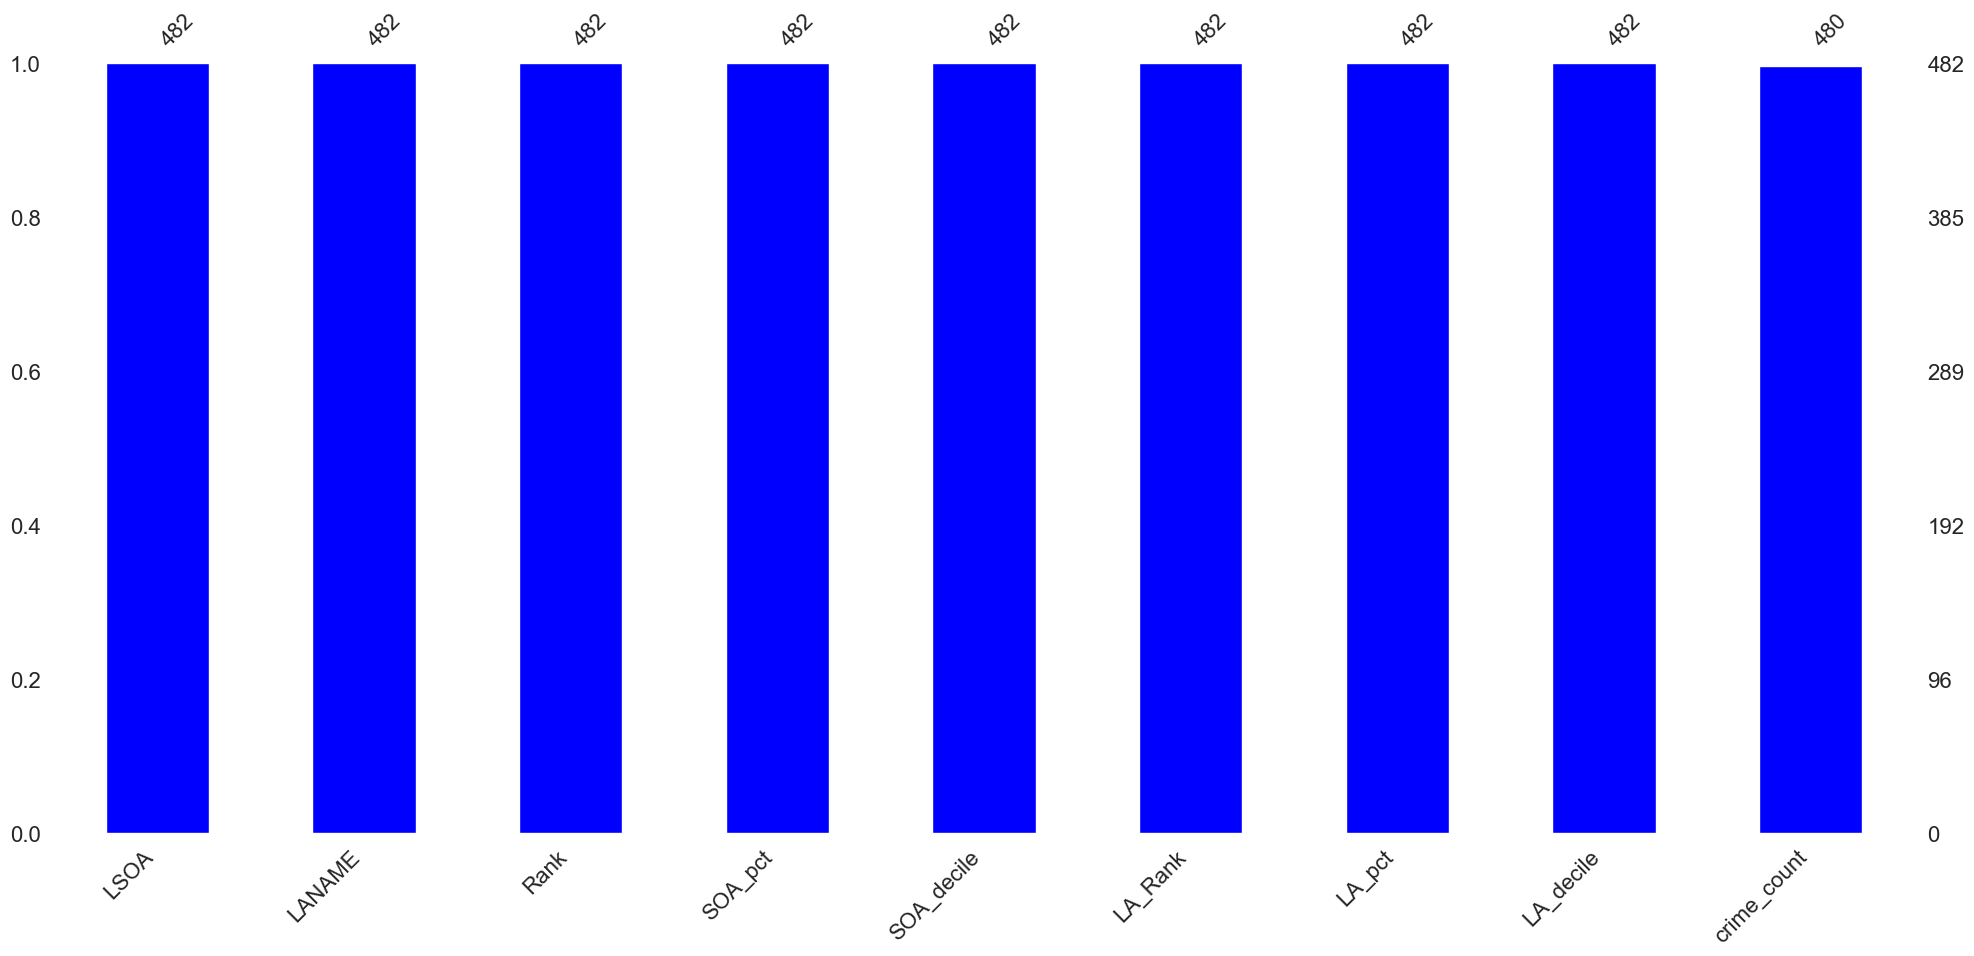

In [24]:
# Use visualization to identify whether a dataframe has null values to more clearly observe columns with null values
ms.bar(LS,color='blue')

In [25]:
# identify if the cell in the dataframe contains no data
LS.isnull().sum()

LSOA           0
LANAME         0
Rank           0
SOA_pct        0
SOA_decile     0
LA_Rank        0
LA_pct         0
LA_decile      0
crime_count    2
dtype: int64

In [26]:
# Remove null values
LS=LS.dropna()
# Check the data set again for null values
LS.isnull().sum()

LSOA           0
LANAME         0
Rank           0
SOA_pct        0
SOA_decile     0
LA_Rank        0
LA_pct         0
LA_decile      0
crime_count    0
dtype: int64

In [27]:
# View first 5 rows of the LS dataframe to get an overview of the dataframe
LS.head()

,LSOA,LANAME,Rank,SOA_pct,SOA_decile,LA_Rank,LA_pct,LA_decile,crime_count
0,E01011264,Leeds,13915,42,5,93,29,3,3.0
1,E01011265,Leeds,20368,62,7,93,29,3,20.0
2,E01011266,Leeds,29666,90,10,93,29,3,12.0
3,E01011267,Leeds,9111,28,3,93,29,3,9.0
4,E01011268,Leeds,6082,19,2,93,29,3,13.0


In [28]:
# Rename columns in a dataset so they are better understood
LS = LS.rename(columns={'SOA_decile': 'depri_level'})
# View first 5 rows of the LS dataframe to get an overview of the dataframe
LS.head()

,LSOA,LANAME,Rank,SOA_pct,depri_level,LA_Rank,LA_pct,LA_decile,crime_count
0,E01011264,Leeds,13915,42,5,93,29,3,3.0
1,E01011265,Leeds,20368,62,7,93,29,3,20.0
2,E01011266,Leeds,29666,90,10,93,29,3,12.0
3,E01011267,Leeds,9111,28,3,93,29,3,9.0
4,E01011268,Leeds,6082,19,2,93,29,3,13.0


In [29]:
# carry out the correlation study between deprivation level and number of crimes through Spearman model
LDs_corr =LS[['crime_count',
       'depri_level']].corr(method = 'spearman')
# Show the LDs_corr
LDs_corr

,crime_count,depri_level
crime_count,1.000000,-0.716226
depri_level,-0.716226,1.000000


Labels: Index(['crime count', 'depri level'], dtype='object') Index(['crime count', 'depri level'], dtype='object')
Labels with capital letters: ['Crime count', 'Depri level'] ['Crime count', 'Depri level']


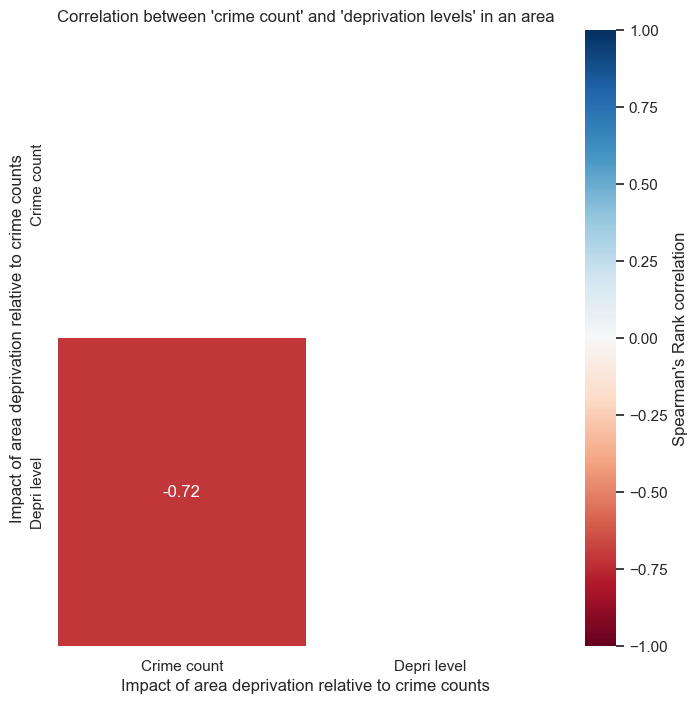

In [30]:
# define plot size
fig,ax = plt.subplots(figsize=(8,8))

# define mask to apply to upper right hand corner of the plot to better observe the visualization
data_to_mask = np.triu(np.ones_like(LDs_corr))

# define axis tick labels
# Get index and columns named crime count and deprivation level
x_axis_labels = LDs_corr.columns.str.replace('_',' ')
y_axis_labels = LDs_corr.index.str.replace('_',' ')

# Have a look at what the tick labels look like
print('Labels:',x_axis_labels ,y_axis_labels)

# for each element in the list of x_axis_labels, capitalize it
x_axis_labels = [element.capitalize() for element in x_axis_labels]
y_axis_labels = [element.capitalize() for element in y_axis_labels]

# look at the new labels
print('Labels with capital letters:',x_axis_labels ,y_axis_labels)


# plot a heatmap of the correlation dataframe
sns.heatmap(LDs_corr,
            # annotate so spearman's rank correlation values are displayed on the squares
            annot=True,
            # define colourmap
            cmap='RdBu',
            # define value of minimum colour on cbar
            vmin=-1,
            # define value of maximum colour on cbar
            vmax=1,
            # add the mask
            mask=data_to_mask,
            # use the custom tick labels
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels,
            # add a label to the cbar
            cbar_kws={'label': "Spearman's Rank correlation"},
            # plot on the axis we defined
            ax=ax)

# Set axis labels
ax.set(xlabel="Impact of area deprivation relative to crime counts",
       ylabel="Impact of area deprivation relative to crime counts",
      title ="Correlation between 'crime count' and 'deprivation levels' in an area" );

### Visualize variables

Text(0.5, 1.0, 'The association between "Number of crimes" and "Deprivation Level"')

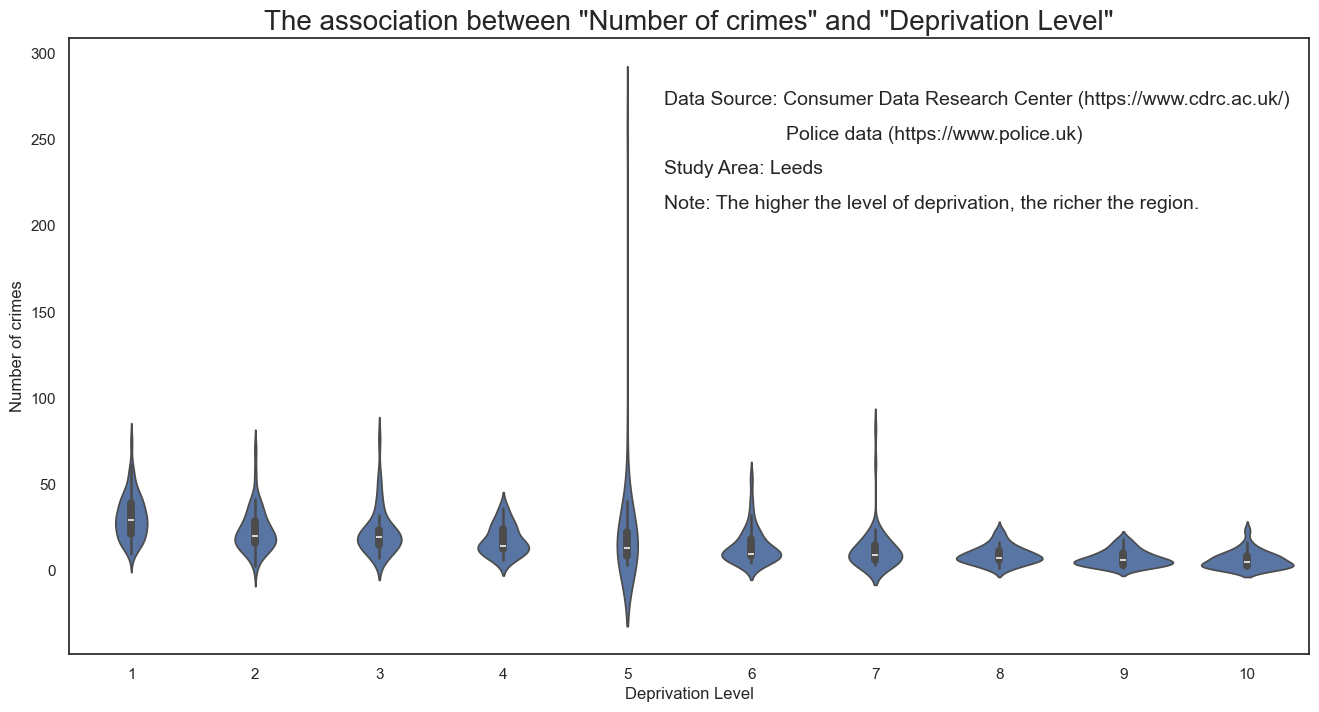

In [31]:
# create a visualisation showing the association between two variable
# Determine image size
plt.figure(figsize=(16,8))
#Draw a line chart using "depri_level" of the leeds_ff data set as the x-axis and "case_Count" as the y-axis. The line width is set to 10 and the style is set to circle.
sns.violinplot(x='depri_level', y='crime_count', data=LS);
# define the palette
sns.color_palette("viridis")
# describe the data source
plt.text(4.3,270,'Data Source: Consumer Data Research Center (https://www.cdrc.ac.uk/)',fontsize=14)
# describe the data source
plt.text(5.28,250,'Police data (https://www.police.uk)',fontsize=14)
#describe the study area
plt.text(4.3,230,'Study Area: Leeds',fontsize=14)
# add the note
plt.text(4.3,210,'Note: The higher the level of deprivation, the richer the region.',fontsize=14)
#add the x-axis label and title
plt.xlabel('Deprivation Level')
#add the y-axis label
plt.ylabel('Number of crimes')
#add the title
plt.title('The association between "Number of crimes" and "Deprivation Level"',fontsize=20)

### Explore and clean data

In [32]:
# view first 5 rows of the leeds_shp geodatafame to see an overview of the dataset
leeds_shp.head()

,FID,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,10720,E01011264,Leeds 011A,420937,441836,-1.68306,53.87232,14a73329-fc8f-464c-a4fa-1963baa35500,"POLYGON ((421248.688 442315.812, 421284.073 44..."
1,10721,E01011265,Leeds 009A,418988,441951,-1.71269,53.87343,eda471dd-f408-4dab-917e-c5e188310b35,"POLYGON ((418635.000 442559.000, 418637.555 44..."
2,10722,E01011266,Leeds 008A,417489,442615,-1.73545,53.87945,286c32c5-ef49-4ecc-a45e-57630c165c62,"POLYGON ((417783.688 443382.312, 417788.688 44..."
3,10723,E01011267,Leeds 009B,419641,442025,-1.70276,53.87407,318cfaa3-9f08-4d61-a30e-82e903f3a7ba,"POLYGON ((419607.843 442388.568, 419612.752 44..."
4,10724,E01011268,Leeds 010A,420224,441935,-1.69390,53.87324,049e79f0-cd9e-47dc-848b-b6d6fa6825ac,"POLYGON ((420442.406 442436.687, 420443.313 44..."


In [33]:
#View "leeds_shp" coordinate system to check if the correct coordinate system is used
leeds_shp.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [34]:
#join the leeds_shp data to the LS dataframe using a lefthand join, on the common ID 'LSOA21CD'/'LSOA' to prepare for drawing variables on the map later
LDS =leeds_shp.merge(LS, how='left',left_on='LSOA21CD',right_on='LSOA')

In [35]:
#view first 5 rows of the LDS dataframe to see an overview of the dataset
LDS.head()

,FID,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,LSOA,LANAME,Rank,SOA_pct,depri_level,LA_Rank,LA_pct,LA_decile,crime_count
0,10720,E01011264,Leeds 011A,420937,441836,-1.68306,53.87232,14a73329-fc8f-464c-a4fa-1963baa35500,"POLYGON ((421248.688 442315.812, 421284.073 44...",E01011264,Leeds,13915.0,42.0,5.0,93.0,29.0,3.0,3.0
1,10721,E01011265,Leeds 009A,418988,441951,-1.71269,53.87343,eda471dd-f408-4dab-917e-c5e188310b35,"POLYGON ((418635.000 442559.000, 418637.555 44...",E01011265,Leeds,20368.0,62.0,7.0,93.0,29.0,3.0,20.0
2,10722,E01011266,Leeds 008A,417489,442615,-1.73545,53.87945,286c32c5-ef49-4ecc-a45e-57630c165c62,"POLYGON ((417783.688 443382.312, 417788.688 44...",E01011266,Leeds,29666.0,90.0,10.0,93.0,29.0,3.0,12.0
3,10723,E01011267,Leeds 009B,419641,442025,-1.70276,53.87407,318cfaa3-9f08-4d61-a30e-82e903f3a7ba,"POLYGON ((419607.843 442388.568, 419612.752 44...",E01011267,Leeds,9111.0,28.0,3.0,93.0,29.0,3.0,9.0
4,10724,E01011268,Leeds 010A,420224,441935,-1.69390,53.87324,049e79f0-cd9e-47dc-848b-b6d6fa6825ac,"POLYGON ((420442.406 442436.687, 420443.313 44...",E01011268,Leeds,6082.0,19.0,2.0,93.0,29.0,3.0,13.0


<Axes: >

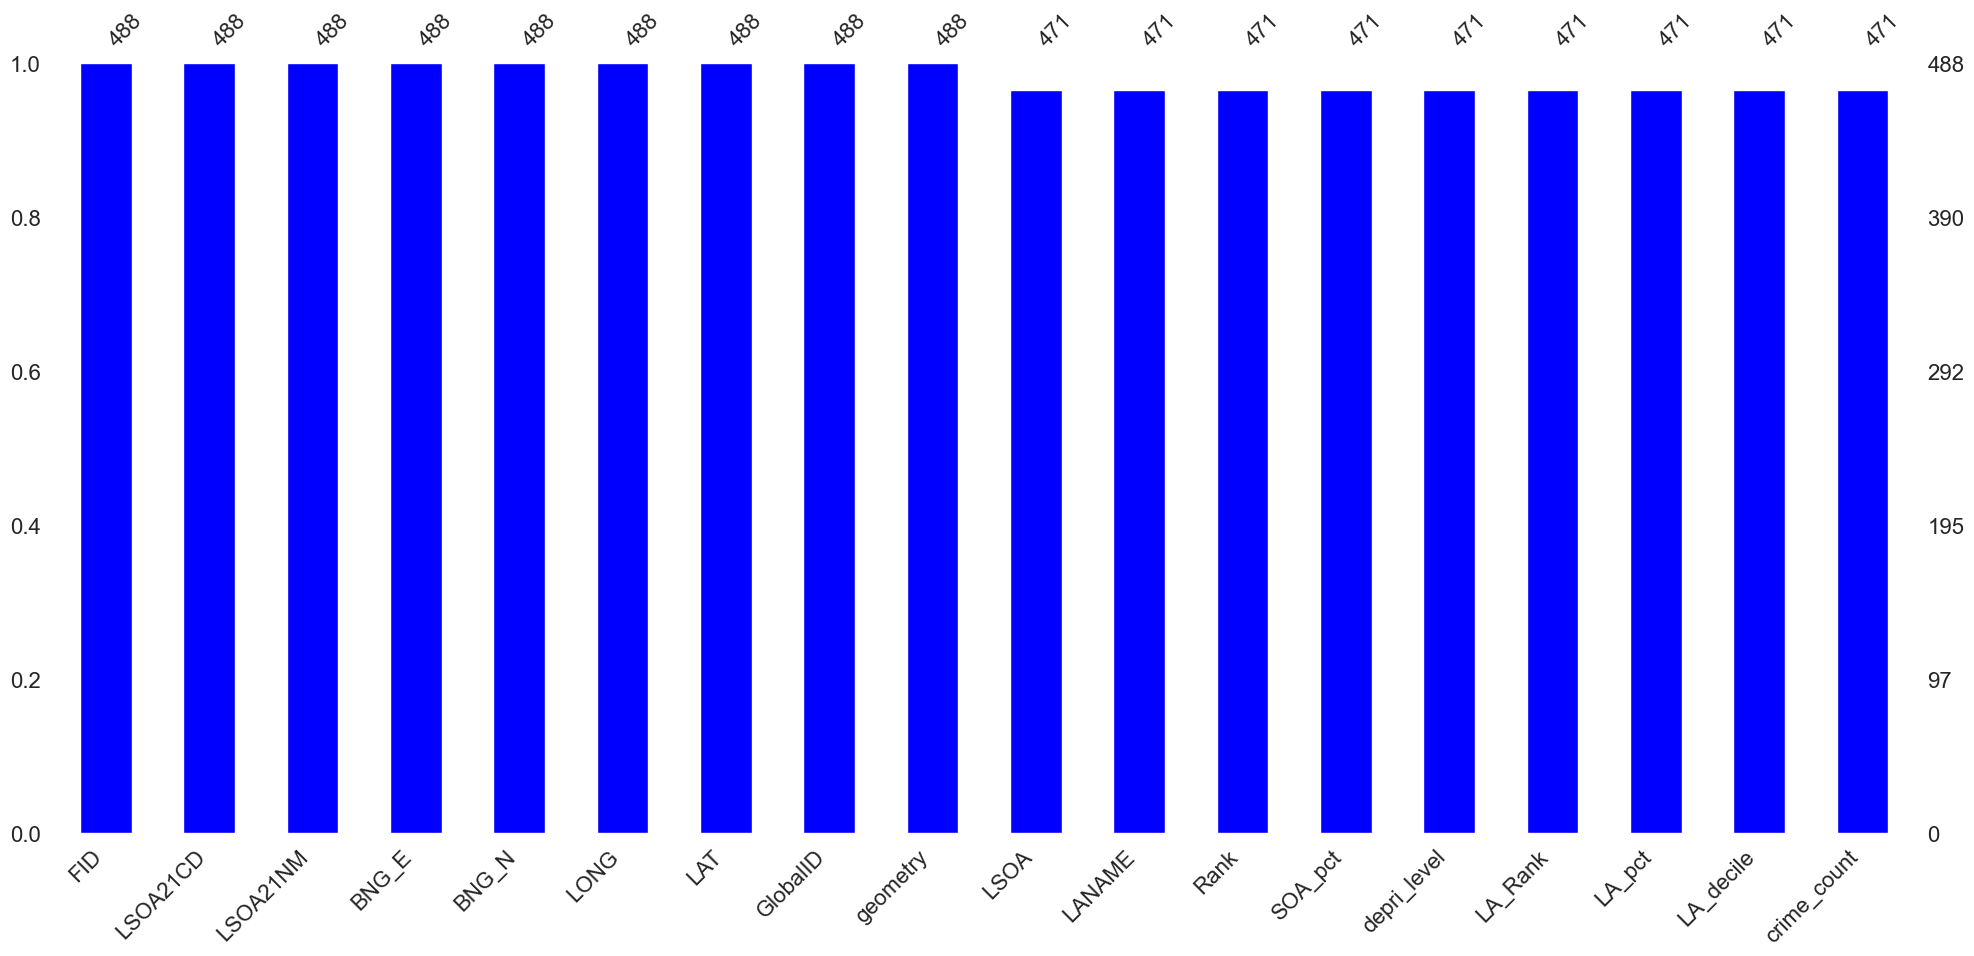

In [36]:
# Use visualization to identify whether a dataframe has null values to more clearly observe columns with null values
ms.bar(LDS,color='blue')

In [37]:
# identify if the cell in the dataframe contains no data
LDS.isnull().sum()

FID             0
LSOA21CD        0
LSOA21NM        0
BNG_E           0
BNG_N           0
LONG            0
LAT             0
GlobalID        0
geometry        0
LSOA           17
LANAME         17
Rank           17
SOA_pct        17
depri_level    17
LA_Rank        17
LA_pct         17
LA_decile      17
crime_count    17
dtype: int64

In [38]:
# Remove null values
LDS=LDS.dropna()
# Check again if there are null values in the dataframe
LDS.isnull().sum()

FID            0
LSOA21CD       0
LSOA21NM       0
BNG_E          0
BNG_N          0
LONG           0
LAT            0
GlobalID       0
geometry       0
LSOA           0
LANAME         0
Rank           0
SOA_pct        0
depri_level    0
LA_Rank        0
LA_pct         0
LA_decile      0
crime_count    0
dtype: int64

In [39]:
# generate statistical summaries about data to identify whether there are outliers
LDS.describe()

,FID,BNG_E,BNG_N,LONG,LAT,Rank,SOA_pct,depri_level,LA_Rank,LA_pct,LA_decile,crime_count
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.00000,471.000000,471.0,471.0,471.0,471.000000
mean,12388.876858,429723.575372,435049.439490,-1.550094,53.810868,13954.276008,42.48620,4.768577,93.0,29.0,3.0,18.581741
std,5208.473203,5846.581721,4787.904661,0.088777,0.043053,10218.672278,31.11426,3.093499,0.0,0.0,0.0,17.894050
min,10720.000000,415777.000000,424017.000000,-1.761510,53.711780,38.000000,0.00000,1.000000,93.0,29.0,3.0,1.000000
25%,10837.500000,425557.000000,432240.500000,-1.613375,53.785445,3579.500000,11.00000,2.000000,93.0,29.0,3.0,8.000000
50%,10955.000000,429403.000000,434982.000000,-1.555060,53.810250,13990.000000,43.00000,5.000000,93.0,29.0,3.0,14.000000
75%,11072.500000,433388.000000,437782.500000,-1.494795,53.835280,22794.500000,69.00000,7.000000,93.0,29.0,3.0,25.000000
max,31280.000000,444141.000000,449492.000000,-1.330510,53.940040,32664.000000,99.00000,10.000000,93.0,29.0,3.0,257.000000


In [40]:
# Check the data type of each column in the data table to check whether the variable type is appropriate
LDS.dtypes

FID               int64
LSOA21CD         object
LSOA21NM         object
BNG_E             int64
BNG_N             int64
LONG            float64
LAT             float64
GlobalID         object
geometry       geometry
LSOA             object
LANAME           object
Rank            float64
SOA_pct         float64
depri_level     float64
LA_Rank         float64
LA_pct          float64
LA_decile       float64
crime_count     float64
dtype: object

### Visualize variables in the map

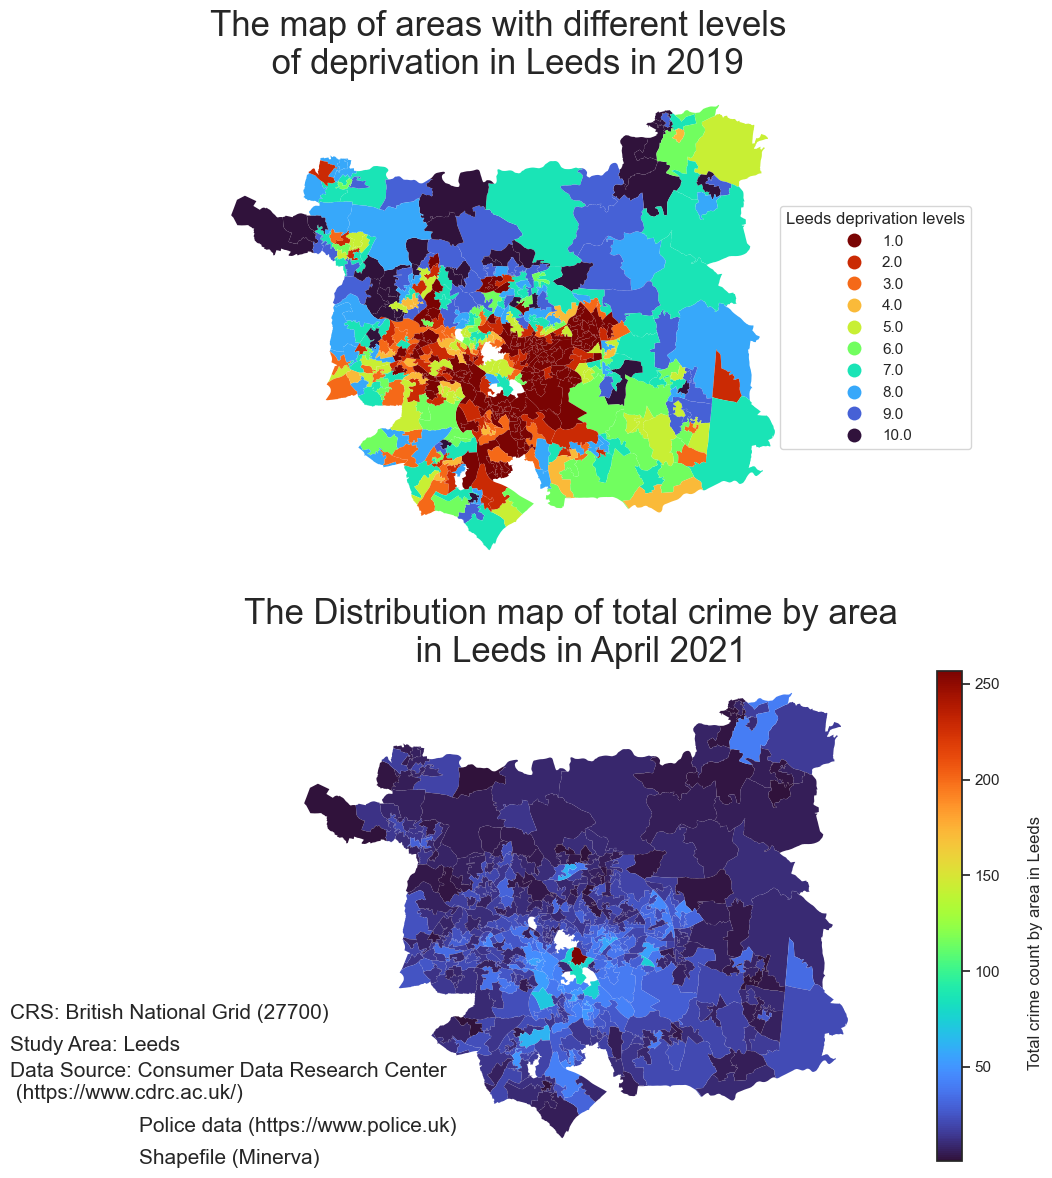

In [41]:
# produce a plot and set plot size
fig, ax = plt.subplots(2, 1, figsize=(16, 14))


# Set the variable for the first subplot and plot
LDS.plot(column='depri_level',

# format the plot

# reduce linewidth between polygons
linewidth =0.01,
# specify data is categorical (ordinal)
categorical=True,
# show the legend
legend=True,
# define the legend palette
cmap='turbo_r',
# Set the first subplot axis
ax=ax[0],
# position the legend
legend_kwds={'loc': 'center left','bbox_to_anchor':(0.95,0.5)})
# set the legend label
legend=ax[0].get_legend()
# describe the legend label
legend.set_title('Leeds deprivation levels')

# give subplot 1 an informative title
ax[0].set_title('The map of areas with different levels \n of deprivation in Leeds in 2019',fontsize=25)

# Set the variable for the second subplot and plot
LDS.plot(column='crime_count',
# format the plot
# reduce linewidth between polygons
linewidth =0.01,
# show the legend
legend=True,
# define the legend palette
cmap='turbo',
# Set the second subplot axis
ax=ax[1])

# give subplot 2 an informative title to look better
ax[1].set_title('The Distribution map of total crime by area \n in Leeds in April 2021',fontsize=25)

# describe the legend label
plt.text(458000,427000,'Total crime count by area in Leeds',fontsize=12,rotation=90)
# describe the data source and coordinate System
plt.text(395000,425000,'Data Source: Consumer Data Research Center \n (https://www.cdrc.ac.uk/)',fontsize=15)
# describe the data source
plt.text(403000,423000,'Police data (https://www.police.uk)',fontsize=15)
# describe the data source
plt.text(403000,421000,'Shapefile (Minerva)',fontsize=15)
# describe the data source
plt.text(395000,428000,'Study Area: Leeds',fontsize=15)
# describe the CRS
plt.text(395000,430000,'CRS: British National Grid (27700)',fontsize=15)

# make axis invisible for subplot 1
ax[0].set_axis_off()

# make axis invisible for subplot 1
ax[1].set_axis_off()
# Show the plot
plt.show();

### The project report

In this project, the topic chosen was “Is there a correlation between poverty levels and total crime in Leeds?” The selected data are regional deprivation index ranking data for England in 2019, crime data for West Yorkshire, England, and shape data for Leeds in April 2021, which are respectively from "https://www.cdrc.ac.uk", " https://www.police.uk” and “Minerva”. The latest data for England's Regional Deprivation Index ranking is 2019, and the closest to 2019 data available for crime data in West Yorkshire, England, is April 2021, so these two data sets were chosen. First, the necessary installation packages for data processing were imported, then the required data was read and then the data was explored and cleaned. In this process, the data of Leeds was first filtered out from the regional deprivation index ranking data of England and the crime data of West Yorkshire, and two data sets were generated: the Leeds crime number and the Leeds deprivation ranking. Since there are useless variables in the Leeds crime number data set that are irrelevant to this study, these variables were removed to make subsequent research more concise and understandable (Safat et al., 2021). This dataset is then class-checked to ensure that each column has the appropriate data type. For the Leeds deprivation ranking data set, statistical summaries were performed, and box plots were drawn to help confirm that no outliers existed (Schwertman et al., 2004). In addition, null value statistics were also performed on these two data sets to ensure that there are no null values. Then the two data sets were merged to form the 'leeds' data set, and null values were detected in the form of a bar chart (Maćkowski and Brzoza, 2022). After excluding null values, the 'leeds' data set was used as 'LSOA code 'Perform statistical summaries for the groups to get the number of occurrences in each area, that is, the number of crimes in each area of Leeds in April 2021, and record them in 'counts', and give the new column the number of crimes. Thereafter, 'counts' is turned into a data frame and merged with the Leeds deprivation rankings data frame to form 'LS', and its null values are detected and excluded. To make subsequent visualisations easier to understand, the variables in ‘LS’ are renamed. At this point, the data cleaning and exploration are temporarily completed. Next, we will conduct a correlation analysis between the number of crimes and deprivation levels in 'LS'. In this study, the model chosen to analyse the correlation is the Spearman model. This model is very suitable for analysing the relationship between deciles and continuous variables. It is insensitive to data distribution and can detect the linear monotonic relationship between two variables (de Winter et al., 2016). It is then visualised through the values produced by the model. During the visualisation process, the repeated numerical parts in the picture were omitted by creating a mask to make the image more beautiful. At the same time, the colour scheme was selected as 'RdBu', which can effectively show the correlation through the strong contrast of red, white and blue. From the Spearman model, it could be concluded that the correlation coefficient between the level of deprivation and the number of crimes is -0.72, which indicates that there is a strong negative correlation between the two variables, that is, when the level of deprivation is greater, the total number of crimes will be smaller (De Courson and Nettle, 2021).


After this, draw a violin plot with 'depri_level' as the x-axis and 'crime_count' as the y-axis. The violin plot was chosen because it could well show the relationship between decile variables and other numerical variables, the distribution shape, central tendency, and peak value of the data, and is very beautiful and easy to understand (Kenny and Schoen, 2021). Its colour scheme is 'Viridis', which is extremely friendly to colour blindness (Katsnelson, 2021) and is displayed in blue in this visualisation. Blue symbolises calm and authority, making it more convincing. In this visualisation, annotations such as data sources are also added to increase the readability and beauty of the visualisation. It could be concluded from this visualisation that although there are individual areas with high levels of deprivation that have extremely high crime numbers, such as areas with a level of deprivation of 5, the general trend is that areas with low levels of deprivation have concentrated crime numbers, and their medians are generally higher than those in areas with high levels of deprivation, which means that the number of crimes in areas with low levels of deprivation is generally greater than in areas with high levels of deprivation.


Next, enter the data exploration and processing of spatial visualisation. First, give an overview of Leeds' shape file and view its coordinate system information. Then merge Leeds' shape file and 'LS' to generate 'LDS’ and exclude its null values. Then perform a statistical summary on 'LDS' to identify whether there are any outliers. Finally, the column of deprivation level and number of crimes in ‘LDS’ are visualised in the form of two subgraphs. During visualisation, set the line width between polygons to 0.01 to make the area boundaries easily distinguishable without affecting the overall aesthetics of the map. Since one set of data is categorical and the other set is not, the legends of the two subfigures are not the same. The colour scheme of the subplot about the number of crimes is 'turbo', which is colour-blind friendly (Jambor et al., 2021), and uses dark blue to represent the lowest value, the lighter the colour, the higher the value; dark red represents the highest value, the value The lighter the colour, the lower the colour. Red and blue are attractive to observers. Red usually represents violence, which is very suitable here to refer to high crime numbers, while blue represents peace and is used to refer to low crime numbers. For convenience of comparison, the subgraphs related to deprivation levels use ‘turbo_r’ to make their polarities consistent. In addition to this, the legends were repositioned and enhanced aesthetically, and the titles were added to the visualisation. Also, add text, such as data sources, to make the visualisation more understandable. From this visualisation, it could be concluded that in terms of deprivation levels, deprivation levels are generally low in Leeds city centre, while deprivation levels are higher in the periphery of the city centre and in the suburbs. This means that the city centre of Leeds is relatively poor, while the suburbs and even the fringes of the city are extremely wealthy. As for the number of crimes, the number of crimes in Leeds gradually decreases towards the periphery of the city centre, and the number of crimes in Leeds' suburbs and outer edges is extremely low. Combining these two results could be summarised as follows: The Leeds city centre, as a poor area, has generally high crime numbers, while the suburbs and outer edges of Leeds, as wealthy areas, have extremely low crime numbers. This is consistent with the visualisation results obtained during the non-spatial analysis process.


The target audience for both visualisations is policymakers, who can use the visualisations to understand the correlation between poverty and crime and the distribution of poverty and crime in Leeds to develop effective and targeted social and economic policies.


#### **References：**

De Courson, B. and Nettle, D. 2021. Why do inequality and deprivation produce high crime and low trust? *Scientific Reports.* **11**(1).

de Winter, J.C.F., Gosling, S.D. and Potter, J. 2016. Comparing the Pearson and Spearman correlation coefficients across distributions and sample sizes: A tutorial using simulations and empirical data. *Psychological Methods.* **21**(3), pp.273–290.

Jambor, H., Antonietti, A., Alicea, B., Audisio, T.L., Auer, S., Bhardwaj, V., Burgess, S.J., Ferling, I., Gazda, M.A., Hoeppner, L.H., Ilangovan, V., Lo, H., Olson, M., Mohamed, S.Y., Sarabipour, S., Varma, A., Walavalkar, K., Wissink, E.M. and Weissgerber, T.L. 2021. Creating clear and informative image-based figures for scientific publications J. R. Swedlow, ed. *PLOS Biology.* **19**(3), p.e3001161.

Katsnelson, A. 2021. Colour me better: fixing figures for colour blindness. *Nature.* **598**(7879), pp.224–225.

Kenny, M. and Schoen, I. 2021. Violin SuperPlots: visualizing replicate heterogeneity in large data sets T. D. Pollard, ed. *Molecular Biology of the Cell*. **32**(15), pp.1333–1334.

Maćkowski, M. and Brzoza, P. 2022. Accessible Tutoring Platform Using Audio-Tactile Graphics Adapted for Visually Impaired People. *Sensors.* **22**(22), p.8753.

Safat, W., Asghar, S. and Gillani, S.A. 2021. Empirical Analysis for Crime Prediction and Forecasting Using Machine Learning and Deep Learning Techniques. *IEEE Access.* **9**, pp.70080–70094.

Schwertman, N.C., Owens, M.A. and Adnan, R. 2004. A simple more general boxplot method for identifying outliers. *Computational Statistics & Data Analysis.* **47**(1), pp.165–174.

